___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
df

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

### Data Wrangling
Take info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

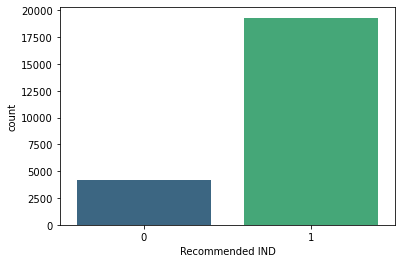

In [4]:
sns.countplot(df['Recommended IND'],palette='viridis')
#data is unbalanced we may use SMOTE or ADASYN

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [5]:
df = df[['Review Text', 'Recommended IND']]
df

Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[23486 rows x 2 columns]

In [6]:
df.columns = ['sentences','label']
df

sentences  label
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
23481  I was very happy to snag this dress at such a ...      1
23482  It reminds me of maternity clothes. soft, stre...      1
23483  This fit well, but the top was very see throug...      0
23484  I bought this dress for a wedding i have this ...      1
23485  This dress in a lovely platinum is feminine an...      1

[23486 rows x 2 columns]

### Missing Value Detection

In [7]:
df.isnull().sum()
# i will drop null rows, without review i dont need label...

sentences    845
label          0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()


sentences    0
label        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  22641 non-null  object
 1   label      22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


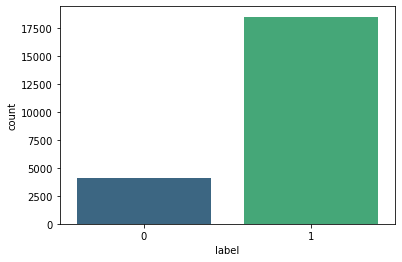

In [10]:
sns.countplot(df['label'],palette='viridis')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

### Noise Removal

### Lexicon Normalization

In [11]:
stop_words = stopwords.words('english')
#stop_words.extend(['film','movie','one','story','make','time'])
lem = WordNetLemmatizer()
def cleaning(data):
    text_tokens = word_tokenize(data.lower()) # 1.Step tokenization.
    text_tokens = [w for w in text_tokens if w.isalpha()]# 2.Step Remove Puncs
    text_tokens = [t for t in text_tokens if t not in stop_words]# 3.Step Remove Stopwords
    text_tokens = [lem.lemmatize(t) for t in text_tokens]# 4.Step Lemmatize
    return " ".join(text_tokens)# Joining

In [12]:
df['sentences'] = df['sentences'].apply(cleaning)
df

<ipython-input-12-d7cf0f893d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['sentences'].apply(cleaning)


sentences  label
0            absolutely wonderful silky sexy comfortable      1
1      love dress sooo pretty happened find store gla...      1
2      high hope dress really wanted work initially o...      0
3      love love love jumpsuit fun flirty fabulous ev...      1
4      shirt flattering due adjustable front tie perf...      1
...                                                  ...    ...
23481  happy snag dress great price easy slip flatter...      1
23482  reminds maternity clothes soft stretchy shiny ...      1
23483  fit well top see never would worked glad able ...      0
23484  bought dress wedding summer cute unfortunately...      1
23485  dress lovely platinum feminine fit perfectly e...      1

[22641 rows x 2 columns]

In [13]:
df.reset_index(drop = True)

sentences  label
0            absolutely wonderful silky sexy comfortable      1
1      love dress sooo pretty happened find store gla...      1
2      high hope dress really wanted work initially o...      0
3      love love love jumpsuit fun flirty fabulous ev...      1
4      shirt flattering due adjustable front tie perf...      1
...                                                  ...    ...
22636  happy snag dress great price easy slip flatter...      1
22637  reminds maternity clothes soft stretchy shiny ...      1
22638  fit well top see never would worked glad able ...      0
22639  bought dress wedding summer cute unfortunately...      1
22640  dress lovely platinum feminine fit perfectly e...      1

[22641 rows x 2 columns]

In [14]:
#Rare words;
text = df["sentences"].values
text = " ".join(text)
print("letter",len(text))
text_list = text.split()
print("word",len(text_list))

letter 3984004
word 625299


In [15]:
text

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress aded basket hte l

In [16]:
from collections import Counter
Counter(text_list).most_common()[-9500:]

[('buyer', 15),
 ('basket', 14),
 ('carbon', 14),
 ('written', 14),
 ('upset', 14),
 ('moved', 14),
 ('monitor', 14),
 ('eat', 14),
 ('te', 14),
 ('slipping', 14),
 ('sticky', 14),
 ('dimension', 14),
 ('bargain', 14),
 ('needing', 14),
 ('location', 14),
 ('forest', 14),
 ('cheerful', 14),
 ('modesty', 14),
 ('throwing', 14),
 ('popular', 14),
 ('pack', 14),
 ('lacing', 14),
 ('drive', 14),
 ('breath', 14),
 ('nip', 14),
 ('serious', 14),
 ('oatmeal', 14),
 ('ddd', 14),
 ('yikes', 14),
 ('email', 14),
 ('stumbled', 14),
 ('puckered', 14),
 ('fav', 14),
 ('lbd', 14),
 ('page', 14),
 ('steam', 14),
 ('instant', 14),
 ('distracting', 14),
 ('festive', 14),
 ('fallen', 14),
 ('finishing', 14),
 ('exceptionally', 14),
 ('virtually', 14),
 ('friendly', 14),
 ('non', 14),
 ('frequently', 14),
 ('lastly', 14),
 ('stained', 14),
 ('heather', 14),
 ('advantage', 14),
 ('bringing', 14),
 ('tweed', 14),
 ('fuzz', 14),
 ('occasionally', 14),
 ('clung', 14),
 ('hugged', 14),
 ('disaster', 14),
 ('g

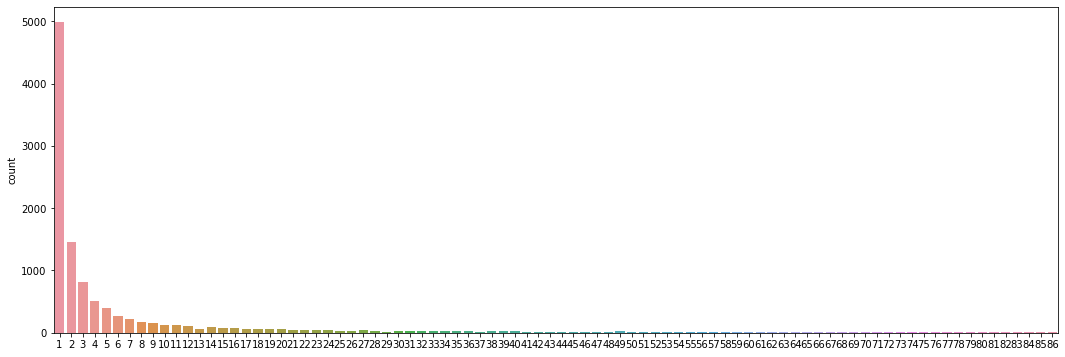

In [17]:
a = list(Counter(text_list).values())
plt.figure(figsize=(18,6))
sns.countplot(sorted(a)[:11000])

In [18]:
one_word_comment = []
for i in df["sentences"].values:
    a = i.split()
    if len(a) < 4:
        one_word_comment.extend(i.split())
        print(i)
print(one_word_comment)        

sweater cute scratchy
great style
initially attracted color
beautiful color
super cute flattering
loved top beautiful
love embroidery
sweater super cute
loved sweater boxy
awesome dress
love top
order size
got green one
would liked small
disappointment price outrageous
fence one pretty
dying skirt picture
beautiful delicate
one timeless sure
dress flattering
comfy cozy
soft sweet
glad got perfect
great fit
love feel comfort
love wear blouse
small loved
totally see
beautiful sweater
love bird
beautiful design fit
pretty romantic
tried store sheer
great style dressed
color beautiful
pretty comfortable love
love dress
love jean dress
great structure
got absolutely love
ordered friend loved
beautiful flattering blouse
fit perfect
skirt flattering comfortable
love dress color
wonderful style
beautiful comfy love
cute dress taller
great dress vacation
soft comfortable
love simple
fit great comfortable
fit perfect
love dress
become short dress
never write review
love jean
perfect
run little s

In [19]:
rare_words = pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=5]

In [20]:
rare_words

wouldnt        5
accented       5
caribbean      5
perspective    5
puffing        5
              ..
palmarosa      1
frail          1
coincidence    1
annoy          1
fantasy        1
Length: 8150, dtype: int64

In [21]:
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

<ipython-input-21-84126fe194a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))


In [22]:
text_new = df["sentences"].values
text_new = " ".join(text_new)
print("letter",len(text_new))
text_new_list = text_new.split()
print("word",len(text_new_list))

letter 3870596
word 610983


In [23]:
Counter(text_new_list).most_common()[-10:]

[('wearability', 6),
 ('relationship', 6),
 ('merino', 6),
 ('replacing', 6),
 ('purely', 6),
 ('foam', 6),
 ('fortunate', 6),
 ('junk', 6),
 ('forced', 6),
 ('coupled', 6)]

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [24]:
pos_words_df = df[df['label'] == 1][['sentences']]
pos_words_df

sentences
0            absolutely wonderful silky sexy comfortable
1      love dress sooo pretty happened find store gla...
3      love love love jumpsuit fun flirty fabulous ev...
4      shirt flattering due adjustable front tie perf...
6      basket hte last see would look like person sto...
...                                                  ...
23479  sure ordering skirt could see person first gla...
23481  happy snag dress great price easy slip flatter...
23482  reminds maternity clothes soft stretchy shiny ...
23484  bought dress wedding summer cute unfortunately...
23485  dress lovely feminine fit perfectly easy wear ...

[18540 rows x 1 columns]

In [25]:
neg_words_df = df[df['label'] == 0][['sentences']]
neg_words_df

sentences
2      high hope dress really wanted work initially o...
5      love tracy reese dress one petite foot tall us...
10     dress run small esp zipper area run ordered sp...
22     first pullover styling side zipper would purch...
25     loved material didnt really look long dress pu...
...                                                  ...
23449  tried color really pretty fun want pair pant l...
23450  wanted love jacket soft great color unfortunat...
23460  purchased good price typically love maeve fabr...
23478  surprised positive review product terrible cut...
23483  fit well top see never would worked glad able ...

[4101 rows x 1 columns]

### Collect Words (positive and negative separately)

In [26]:
pos_words = " ".join(pos_words_df['sentences'].values )
neg_words = " ".join(neg_words_df['sentences'].values )

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

Negative


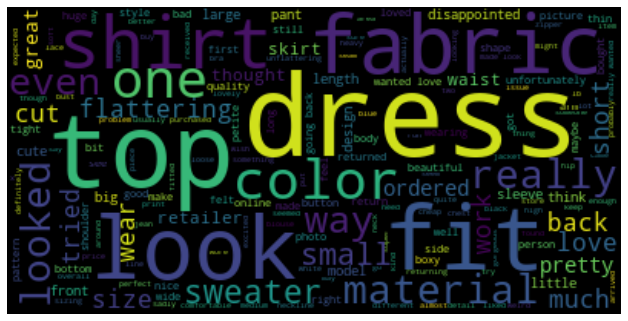

Positive


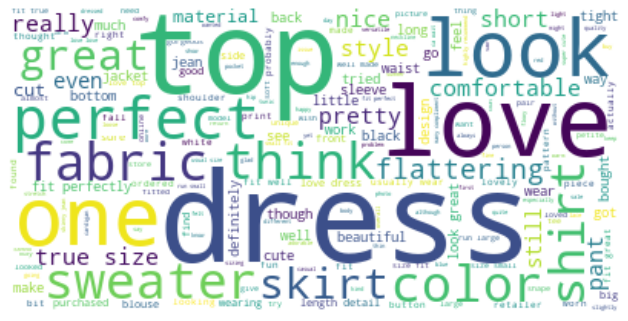

In [27]:
from wordcloud import WordCloud
print('Negative')
wordcloud = WordCloud( max_words = 500)
wordcloud.generate(neg_words)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

print('Positive')
wordcloud = WordCloud(background_color = 'white', max_words = 500)
wordcloud.generate(pos_words)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
stop_words = stopwords.words('english')
stop_words2 = stop_words.extend(['film','movie','one','story','make','time'])
lem = WordNetLemmatizer()

def cleaning(data):
    text_tokens = word_tokenize(data.lower()) # removed the .lower intentionaly 
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words2]
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

print('Negative')
neg_words2 = neg_words_df['sentences'].apply(cleaning)
from wordcloud import WordCloud
original = " ".join(neg_words2)
wordcloud = WordCloud( max_words = 500)
wordcloud.generate(original)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

print('Positive')
pos_words2 = pos_words_df['sentences'].apply(cleaning)
original = " ".join(pos_words2)
wordcloud = WordCloud( max_words = 500)
wordcloud.generate(original)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Negative


TypeError: argument of type 'NoneType' is not iterable

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In the next step we create a numerical feature vector for each document:

### Vectorization

### TF-IDF

### Logistic Regression

### Naive Bayes 



### Support Vector Machine (SVM)

### Random Forest

### Ada  Boosting

### Compare Models Accuracies and F1 Scores

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___